In [1]:
##############################################################################
## EE559 Final Project ===> Mushroom Classification.
## Created by Sudesh Kumar Santhosh Kumar and Thejesh Chandar Rao.
## Date: 6th May, 2023
## Tested in Python 3.10.9 using conda environment version 22.9.0.
##############################################################################

# Final Project -> Classification of Mushrooms (EE - 559)

## Feature Selection for One Hot Encoded Features.

# Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from utils.Transform import standardizeData

## Loading the dataset v1 from Encoding Directory which has the Encoded Features. (Every feature is numerical)

In [3]:
train_data = pd.read_csv("./dataset/Encoded/mushroom_train_v2.csv")
print("Train Data Encoded-> 1: ")
train_data.head()


Train Data Encoded-> 1: 


,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w,class
0,4.98,6.04,6.21,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,p
1,2.84,5.66,3.55,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,p
2,11.44,7.03,25.29,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,e
3,8.77,4.44,13.61,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,p
4,7.55,8.41,18.44,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,e


## Separating Input Features and class labels from the dataset. Also Encoding the class labels from "p" -> 1 and "e" -> 0

In [4]:
X_train = train_data.drop('class', axis=1)  # Select all the features except labels,
y_train = train_data['class']  # Select only the 'class' column.

class_map = {"e" : 0, "p" : 1}
y_train_enc = y_train.map(class_map)

In [5]:
categoricalFeatures = [col for col in X_train.columns if X_train[col].dtype == "object"]
numericalFeatures = [col for col in X_train.columns if X_train[col].dtype == "float64" or X_train[col].dtype == "int64"]

classes, class_index, class_count = np.unique(y_train, return_index=True, return_counts=True, axis=None)

### Checking the Dataset for Categorical Features

In [6]:
print(f"Categorical Features: {categoricalFeatures}")
print(f"Numerical Features: {numericalFeatures}")
print(f"Total number of Categorical Features: {len(categoricalFeatures)}")
print(f"Total number of Numerical Features: {len(numericalFeatures)}")


Categorical Features: []
Numerical Features: ['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-surface_d', 'cap-surface_e', 'cap-surface_g', 'cap-surface_h', 'cap-surface_i', 'cap-surface_k', 'cap-surface_l', 'cap-surface_s', 'cap-surface_t', 'cap-surface_w', 'cap-surface_y', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-spacing_c', 'gill-spacing_d', 'gill-spacing_f', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-co

### Computing the Cross-Correlation co-efficent between Features & Y_train and plotting the absolute values of pearson's co-efficent

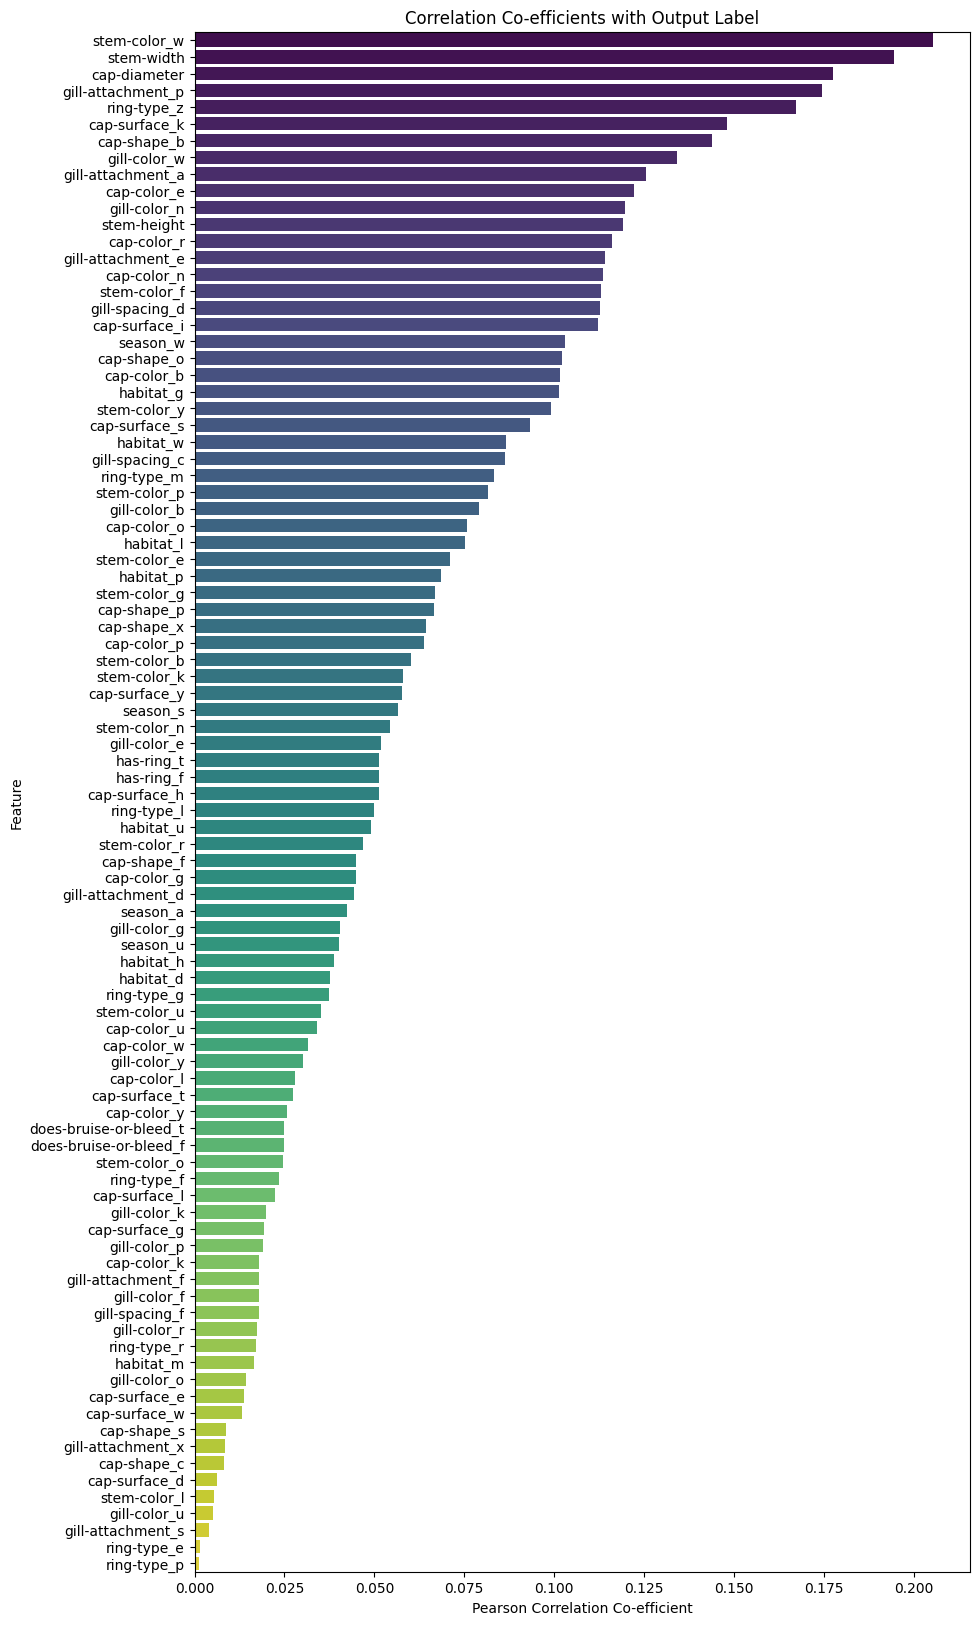

In [7]:
# Calculate Pearson correlations between all features and output label
correlations = X_train.corrwith(y_train_enc, method='pearson')

# Sort the correlations by absolute value
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Create the bar chart using seaborn
plt.figure(figsize=(10, 20))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='viridis')
plt.xlabel('Pearson Correlation Co-efficient')
plt.ylabel('Feature')
plt.title('Correlation Co-efficients with Output Label')
plt.show()


### Considering the top features which have a threhold value of Pearson's co-efficient > threshold from a list thresholds

In [8]:
thresholds = [0.015, 0.025, 0.050, 0.075, 0.1]

for (i, threshold) in enumerate(thresholds):
    # Select the features with correlation coefficient greater than the threshold
    top_features = correlations_sorted[correlations_sorted > threshold].index.tolist()

    X_train_top_pearson = X_train[top_features]

    X_train_top_pearson_std = standardizeData(X_train_top_pearson) 

    train_data_top_pearson = pd.concat([X_train_top_pearson_std, y_train_enc], axis=1)

    print(f"Pearson Co-efficient Technique version: {i+1} & Threshold value: {threshold}")
    print(f"Shape of Training Data after performing Feature Selection using Correlation: {train_data_top_pearson.shape}")
    print(f"Number of Features before performing Feature Selection using Correlation: {train_data.shape[1] - 1} features")
    print(f"Number of Features after performing Feature Selection using Correlation: {train_data_top_pearson.shape[1] - 1} features")
    print()

    ### Converting the data-frame with 37 features to csv file to perform Feature Transformation. (Saving this as v1)
    train_data_top_pearson.to_csv(f"./dataset/FeatureSelected/OneHot/Pearson/mushroom_train_v{i+1}.csv", index=False)




Standardized the Train Data!
Pearson Co-efficient Technique version: 1 & Threshold value: 0.015
Shape of Training Data after performing Feature Selection using Correlation: (42660, 81)
Number of Features before performing Feature Selection using Correlation: 92 features
Number of Features after performing Feature Selection using Correlation: 80 features

Standardized the Train Data!
Pearson Co-efficient Technique version: 2 & Threshold value: 0.025
Shape of Training Data after performing Feature Selection using Correlation: (42660, 66)
Number of Features before performing Feature Selection using Correlation: 92 features
Number of Features after performing Feature Selection using Correlation: 65 features

Standardized the Train Data!
Pearson Co-efficient Technique version: 3 & Threshold value: 0.05
Shape of Training Data after performing Feature Selection using Correlation: (42660, 47)
Number of Features before performing Feature Selection using Correlation: 92 features
Number of Featur

## Use the D' number of features from the D = 147 features by training a simple linear model.

In [9]:
# Create an empty list to store the performance of each feature
feature_performances_linear = []

# Loop over all features in X_train
for feature in X_train.columns:
    
    # Create a new instance of the logistic regression model
    model = LogisticRegression(random_state=42)
    
    # Fit the model using the current feature only
    model.fit(X_train[[feature]], y_train)
    
    # Make predictions using the current feature only
    y_pred = model.predict(X_train[[feature]])
    
    # Calculate the accuracy of the model using the current feature only
    accuracy = accuracy_score(y_train, y_pred)
    
    # Store the performance of the current feature
    feature_performances_linear.append((feature, accuracy))

# Sort the features by their performance (accuracy)
feature_performances_linear = sorted(feature_performances_linear, key=lambda x: x[1], reverse=True)

In [10]:
d_primes_linear = [85, 70, 50]

for i, d_prime in enumerate(d_primes_linear):
    top_features_linear = [x[0] for x in feature_performances_linear[:d_prime]]

    X_train_top_linear = X_train[top_features_linear]
    X_train_top_linear_std = standardizeData(X_train_top_linear)

    train_data_top_linear = pd.concat([X_train_top_linear_std, y_train_enc], axis=1)

    print(f"Linear Model Technique version: {i+1} & d_prime: {d_prime}")
    print(f"Shape of Training Data after performing Feature Selection using Linear Model: {train_data_top_linear.shape}")
    print(f"Number of Features before performing Feature Selection using Linear Model: {train_data.shape[1] - 1} features")
    print(f"Number of Features after performing Feature Selection using Linear Model: {train_data_top_linear.shape[1] - 1} features")
    print()

    ### Converting the data-frame with 37 features to csv file to perform Feature Transformation. (Saving this as v1)
    train_data_top_linear.to_csv(f"./dataset/FeatureSelected/OneHot/LinearRegression/mushroom_train_v{i+1}.csv", index=False)

Standardized the Train Data!
Linear Model Technique version: 1 & d_prime: 85
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 86)
Number of Features before performing Feature Selection using Linear Model: 92 features
Number of Features after performing Feature Selection using Linear Model: 85 features

Standardized the Train Data!
Linear Model Technique version: 2 & d_prime: 70
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 71)
Number of Features before performing Feature Selection using Linear Model: 92 features
Number of Features after performing Feature Selection using Linear Model: 70 features

Standardized the Train Data!
Linear Model Technique version: 3 & d_prime: 50
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 51)
Number of Features before performing Feature Selection using Linear Model: 92 features
Number of Features after performing Feature Selection using Line

## 